In [1]:
#matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc,asc

In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station
    

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(desc(Measurement.date)).first()
print(recent_date.date)                                              

2017-08-23


Text(0, 0.5, 'mm')


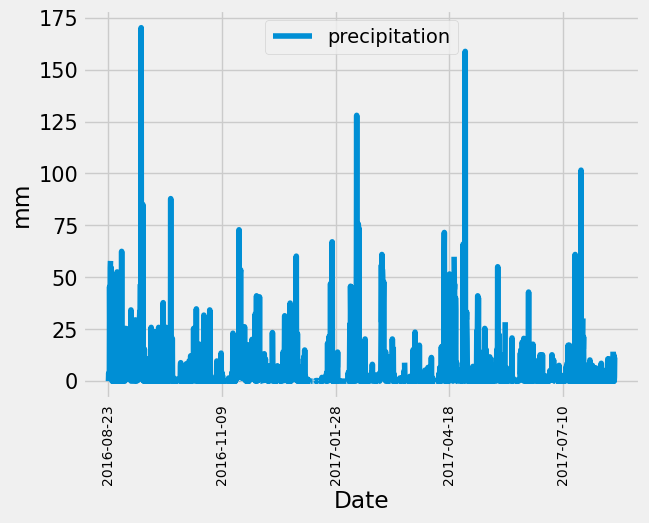

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)
last_year
# Calculate the date one year from the last date in data set.
last_date = dt.date(last_year.year, last_year.month, last_year.day)
#last_date
# Perform a query to retrieve the data and precipitation scores
retrieve_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_date).order_by(Measurement.date).all()
#retrieve_data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df= pd.DataFrame(retrieve_data, columns=['date','precipitation'])

# Sort the dataframe by date
results_df.set_index(results_df['date'], inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot('date', 'precipitation')

plt.xlabel("Date")
plt.ylabel("mm")
plt.legend(["precipitation"],loc ='upper center')
plt.xticks(rotation=90, size = 10)
plt.yticks(size=15)

# Display the y-axis label text object for confirmation
ylabel_text = plt.ylabel("mm")
print(ylabel_text)

plt.show()


In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station=='USC00519281').all()
temperature

[(12.2, 29.4, 22.035822510822513)]

Text(0.5, 4.183333333333314, 'Temprature')


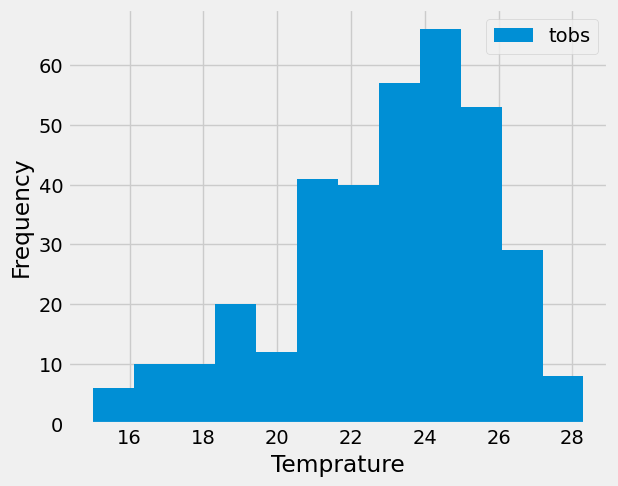

In [29]:
## Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results =session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>='2016-08-23').all()

#Plot results
high_station_temp=pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.legend(["tobs"],loc ='upper right')
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Display the y-axis label text object for confirmation
xlabel_text = plt.xlabel("Temprature")
print(xlabel_text)

plt.show()

# Close Session

In [30]:
# Close Session
session.close()
